# Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
features = ['max temperature',
          'min temperature',
          'dewpoint',
          'precipitation',
          'sea level pressure',
          'standard pressure',
          'visibility',
          'wind speed',
          'max wind speed ',
          'mean temperature']
df = pd.read_table("./endsem_data.dat", sep = '   ', names = features)

/home/nishant/.local/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
df.head()

,max temperature,min temperature,dewpoint,precipitation,sea level pressure,standard pressure,visibility,wind speed,max wind speed,mean temperature
0,45.7,28.4,34.4,0.00,29.95,26.70,5.0,5.29,13.80,37.5
1,48.9,35.6,37.6,0.05,29.71,26.50,5.2,2.99,10.20,40.8
2,43.9,35.6,36.8,0.10,29.69,26.49,5.7,5.18,13.80,39.3
3,42.4,26.6,25.5,0.00,29.95,26.73,8.7,5.41,11.30,35.6
4,42.1,20.7,24.8,0.00,30.22,26.93,6.6,0.92,8.06,29.5


In [4]:
df.describe()

,max temperature,min temperature,dewpoint,precipitation,sea level pressure,standard pressure,visibility,wind speed,max wind speed,mean temperature
count,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000
mean,61.557651,37.075314,36.288682,0.054102,29.978011,26.777004,7.718222,5.393219,13.315221,49.558583
std,17.872696,13.345271,10.819452,0.184401,0.201504,0.138301,1.479250,3.041806,5.498989,15.456399
min,23.000000,-7.100000,-3.100000,0.000000,29.460000,26.300000,0.200000,0.000000,2.190000,7.900000
25%,46.400000,26.600000,28.500000,0.000000,29.830000,26.690000,7.400000,3.110000,10.200000,36.700000
50%,60.800000,36.000000,36.800000,0.000000,29.960000,26.770000,8.300000,5.060000,12.700000,48.500000
75%,77.400000,48.200000,45.300000,0.000000,30.110000,26.870000,8.600000,7.250000,16.100000,63.300000
max,100.000000,65.500000,57.600000,4.000000,30.600000,27.180000,11.500000,18.000000,57.400000,81.800000


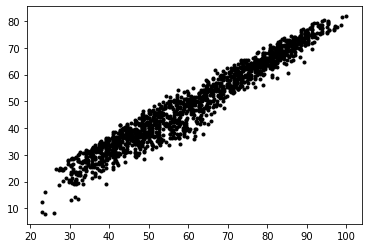

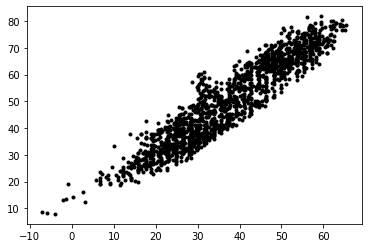

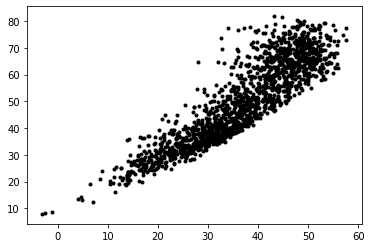

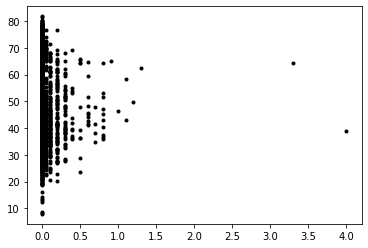

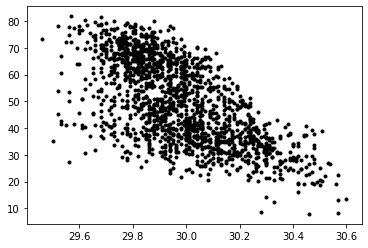

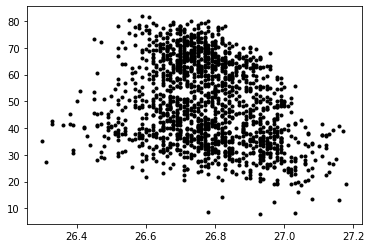

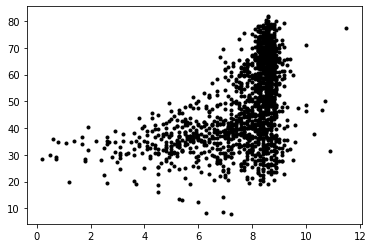

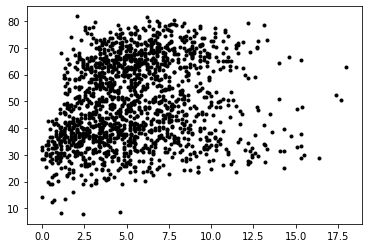

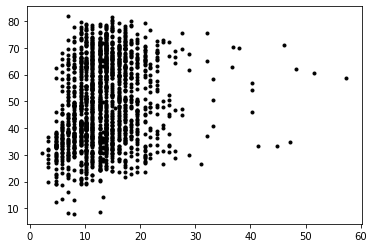

In [5]:
# viewing different features
plot_df = np.array(df)
for i in range(9):
    plt.plot(plot_df[:,i], plot_df[:,9], '.k')
    plt.show()

In [6]:
# df = MinMaxScaler().fit_transform(df)
# df = pd.DataFrame(df, columns=features)
# df

In [7]:
df.describe()

,max temperature,min temperature,dewpoint,precipitation,sea level pressure,standard pressure,visibility,wind speed,max wind speed,mean temperature
count,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000,1609.000000
mean,61.557651,37.075314,36.288682,0.054102,29.978011,26.777004,7.718222,5.393219,13.315221,49.558583
std,17.872696,13.345271,10.819452,0.184401,0.201504,0.138301,1.479250,3.041806,5.498989,15.456399
min,23.000000,-7.100000,-3.100000,0.000000,29.460000,26.300000,0.200000,0.000000,2.190000,7.900000
25%,46.400000,26.600000,28.500000,0.000000,29.830000,26.690000,7.400000,3.110000,10.200000,36.700000
50%,60.800000,36.000000,36.800000,0.000000,29.960000,26.770000,8.300000,5.060000,12.700000,48.500000
75%,77.400000,48.200000,45.300000,0.000000,30.110000,26.870000,8.600000,7.250000,16.100000,63.300000
max,100.000000,65.500000,57.600000,4.000000,30.600000,27.180000,11.500000,18.000000,57.400000,81.800000


In [8]:
X = np.array(df.drop('mean temperature', axis = 1))
y = np.array(df['mean temperature'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# SK learn (for reference)

In [9]:
reg = LinearRegression().fit(X_train, y_train)
reg.coef_, reg.intercept_

(array([ 0.53327968,  0.30085767,  0.12215223,  0.07685538, -9.31072545,
         8.44609254,  0.1755542 ,  0.15717317, -0.05023378]),
 52.550426063183494)

In [10]:
y_pred = reg.predict(X_test)
y_pred.shape

(531,)

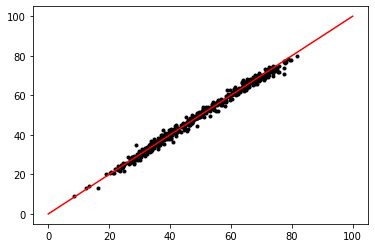

In [11]:
plt.plot(y_test, y_pred, '.k')
plt.plot(np.linspace(0,100,200), np.linspace(0,100,200), '-r')
plt.show()

# BGD - own

In [12]:
#the (euclidean) distance between two vectors
def distance(a,b):
    return np.linalg.norm(np.subtract(a,b))

#batch gradient descent
def batchGradientDescent(X, y, model, learningRate):
    epochs = 100
    loss = np.zeros(epochs)
    count = 0
    while count < epochs:
        N_data = len(X)
        N_features = len(model) - 1

        weights = model[0:N_features]
        bias = model[N_features]
        
        for i in range(N_data):
            loss[count] += (np.dot(weights, X[i]) + bias - y[i])**2

        weights_grad = np.zeros(N_features)
        bias_grad = 0

        for i in range(N_features):
            for j in range(N_data):
                weights_grad[i] += (2/N_data)*(np.dot(weights, X[j]) + bias - y[j])*X[j,i]
        for i in range(N_data):
            bias_grad += (2/N_data)*(np.dot(weights, X[i]) + bias - y[i])

        grad = np.append(weights_grad, [bias_grad])
        model = np.subtract(model, np.multiply(learningRate,grad))
        count += 1
    else:
        return model, loss



In [13]:
guessModel = np.zeros(10)
learningRate = 0.00001

In [14]:
batchGDModel, loss = batchGradientDescent(X_train, y_train, guessModel, learningRate)

In [15]:
batchGDModel

array([3.99339422e-01, 2.52557293e-01, 2.23948274e-01, 1.39762174e-04,
       1.26030658e-01, 1.13193946e-01, 3.90124985e-02, 2.75700275e-02,
       6.28856146e-02, 4.23726428e-03])

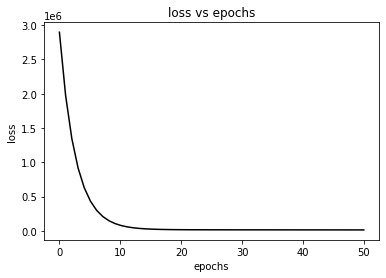

In [16]:
plt.plot(np.linspace(0,50,50), loss[0:50], '-k')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.show()

In [17]:
y_pred = np.zeros(531)
for i in range(531):
    y_pred[i] = np.dot(batchGDModel[0:9], X_test[i]) + batchGDModel[9]

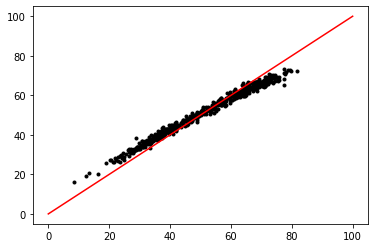

In [18]:
plt.plot(y_test, y_pred, '.k')
plt.plot(np.linspace(0,100,200), np.linspace(0,100,200), '-r')
plt.show()

In [19]:
r2_score(y_test, y_pred)

0.9492206857322781

# L2 regularization

to the loss function add $\lambda \sum_i w_i^2$ \\
This changes only the gradients wrt m, an extra term of 2 $\lambda$ $w_k$ is added to the kth gradient

This decrease the bias in the model

In [20]:
l2 = 0.001

In [21]:

def l2bgd(X, y, model, learningRate, l2):
    epochs = 100
    loss = np.zeros(epochs)
    count = 0
    while count < epochs:
        N_data = len(X)
        N_features = len(model) - 1

        weights = model[0:N_features]
        bias = model[N_features]
        
        for i in range(N_data):
            loss[count] += (np.dot(weights, X[i]) + bias - y[i])**2

        weights_grad = np.zeros(N_features)
        bias_grad = 0

        for i in range(N_features):
            for j in range(N_data):
                weights_grad[i] += (2/N_data)*(np.dot(weights, X[j]) + bias - y[j])*X[j,i]
            # the crucial step
            weights_grad[i] += 2*l2*weights[i]
            
        for i in range(N_data):
            bias_grad += (2/N_data)*(np.dot(weights, X[i]) + bias - y[i])

        grad = np.append(weights_grad, [bias_grad])
        model = np.subtract(model, np.multiply(learningRate,grad))
        count += 1
    else:
        return model, loss



In [22]:
guessModel = np.zeros(10)
learningRate = 0.00001

In [23]:
l2_model, loss = l2bgd(X_test, y_test, guessModel, learningRate, l2)

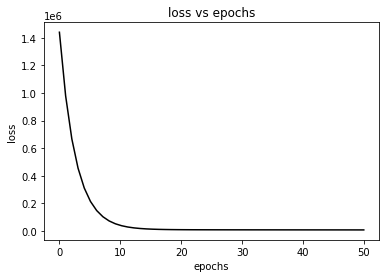

In [24]:
plt.plot(np.linspace(0,50,50), loss[0:50], '-k')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.show()

In [25]:
y_pred = np.zeros(531)
for i in range(531):
    y_pred[i] = np.dot(l2_model[0:9], X_test[i]) + batchGDModel[9]

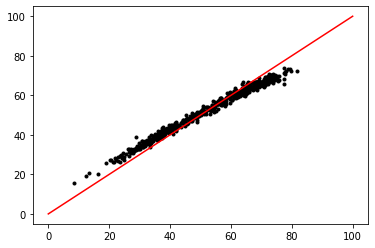

In [26]:
plt.plot(y_test, y_pred, '.k')
plt.plot(np.linspace(0,100,200), np.linspace(0,100,200), '-r')
plt.show()

In [27]:
r2_score(y_test, y_pred)

0.950396775119223

# l1 Regularisation

to the loss function add $\lambda \sum_i ||w_i||$ \\
This changes only the gradients wrt m, an extra term of $\lambda$ x sign($w_k$) is added to the kth gradient

This also decreases the bias in the model

The difference is that this creates a sparse model (sets some weights to zero for high lambda) but l2 uniformly decreases all the weights

In [28]:
l1 = 0.0001

In [29]:

def l1bgd(X, y, model, learningRate, l2):
    epochs = 100
    loss = np.zeros(epochs)
    count = 0
    while count < epochs:
        N_data = len(X)
        N_features = len(model) - 1

        weights = model[0:N_features]
        bias = model[N_features]
        
        for i in range(N_data):
            loss[count] += (np.dot(weights, X[i]) + bias - y[i])**2

        weights_grad = np.zeros(N_features)
        bias_grad = 0

        for i in range(N_features):
            for j in range(N_data):
                weights_grad[i] += (2/N_data)*(np.dot(weights, X[j]) + bias - y[j])*X[j,i]
            # The crucial step
            weights_grad[i] += 2*l1*np.sign(weights[i])
            
        for i in range(N_data):
            bias_grad += (2/N_data)*(np.dot(weights, X[i]) + bias - y[i])

        grad = np.append(weights_grad, [bias_grad])
        model = np.subtract(model, np.multiply(learningRate,grad))
        count += 1
    else:
        return model, loss

In [30]:
guessModel = np.zeros(10)
learningRate = 0.00001

In [31]:
l1_model, loss = l1bgd(X_test, y_test, guessModel, learningRate, l1)

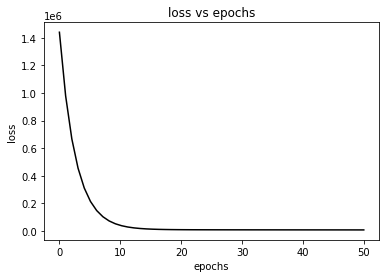

In [32]:
plt.plot(np.linspace(0,50,50), loss[0:50], '-k')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.show()

In [33]:
y_pred = np.zeros(531)
for i in range(531):
    y_pred[i] = np.dot(l1_model[0:9], X_test[i]) + batchGDModel[9]

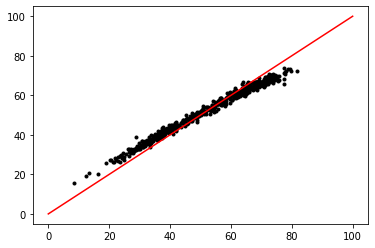

In [34]:
plt.plot(y_test, y_pred, '.k')
plt.plot(np.linspace(0,100,200), np.linspace(0,100,200), '-r')
plt.show()

In [35]:
r2_score(y_test, y_pred)

0.9503968352194174

# Varying hyperparameter

varying l1, l2

In [36]:
r2 = np.zeros(10)
for count, i in enumerate(np.geomspace(0.00001, 1000, 10)):
    l2_model, loss = l2bgd(X_test, y_test, guessModel, learningRate, i)
    y_pred = np.zeros(531)
    for i in range(531):
        y_pred[i] = np.dot(l2_model[0:9], X_test[i]) + batchGDModel[9]
    r2[count] = r2_score(y_test, y_pred)

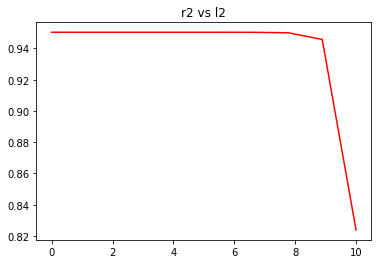

In [37]:
plt.plot(np.linspace(0,10,10), r2, '-r')
plt.title('r2 vs l2')
plt.show()

# decreasing L2 is increasing R$^2$